# CompanYX Turnover Rate Analysis

## 1- Import libraries

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 2- DATASET LOAD AND INSPECTION

In [233]:
df = pd.read_csv("CompanYX_data.csv", delimiter= ";")

df.head()

,age,turnover,travel,department,distance_from_home,education,field_of_study,employees,id,environment_satisfaction,...,performance_rating,relationship_satisfaction,total_working_hours,stock_option_level,years_at_company,training_times_last_year,work_life_balance,years_with_curr_manager,years_in_current_role,years_since_last_promotion
0,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,1,Medium,...,High,Low,80,0,8,0,NaN,6,NaN,0
1,49,No,Travel_Frequently,Research & Development,8,Secondary,Life Sciences,1,2,High,...,Medium,Very_High,80,1,10,3,NaN,10,NaN,1
2,37,Yes,Travel_Rarely,Research & Development,2,Secondary,Other,1,4,Very_High,...,High,Medium,80,0,7,3,NaN,0,2.0,0
3,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,5,Very_High,...,High,High,80,0,8,3,NaN,8,3.0,3
4,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,7,Low,...,High,Very_High,80,1,6,3,NaN,2,NaN,2


## 3- DATA QUALITY INSPECTION

### 3.1- Duplicated values inspection

In [234]:
df.duplicated().any()

False

There are not duplicated values

### 3.2- Datatype validation and missing data inspection

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   turnover                    1470 non-null   object 
 2   travel                      1470 non-null   object 
 3   department                  1470 non-null   object 
 4   distance_from_home          1470 non-null   int64  
 5   education                   1369 non-null   object 
 6   field_of_study              1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   id                          1470 non-null   int64  
 9   environment_satisfaction    1470 non-null   object 
 10  gender                      1470 non-null   float64
 11  involvement                 1452 non-null   object 
 12  job_level                   1470 non-null   int64  
 13  position                    1470 

There are some null values, first we inpect the quantity of null values per variable, then we decide about what technique is the better in order to handle the meissing values.

### 3.3- Handling missing data

In [236]:
missing_values = df.isnull().sum()

print(missing_values.sort_values(ascending=False))

years_in_current_role         1238
work_life_balance             1011
education                      101
job_satisfaction                76
involvement                     18
age                              0
relationship_satisfaction        0
overtime                         0
percent_salary_hike              0
performance_rating               0
stock_option_level               0
total_working_hours              0
num_companies_worked             0
years_at_company                 0
training_times_last_year         0
years_with_curr_manager          0
over_18                          0
marital_status                   0
monthly_income                   0
turnover                         0
position                         0
job_level                        0
gender                           0
environment_satisfaction         0
id                               0
employees                        0
field_of_study                   0
distance_from_home               0
department          

For better understandng we can inpect missing data as a percentage

In [237]:
percentage_missing_values = (df.isnull().sum() / len(df)) * 100

print(percentage_missing_values.sort_values(ascending=False).head(6))

years_in_current_role    84.217687
work_life_balance        68.775510
education                 6.870748
job_satisfaction          5.170068
involvement               1.224490
age                       0.000000
dtype: float64


Variables `years_in_current_role` and `work_life_balance` have 84% and 69% of their entries as missing values, as more than a half of the data is missed, we decide to revoke both variables for the current analysis. Techniques such as single or multiple imputation can lead to potential bias, and as we have other variables that may affect the turnover rate, we decide to move on with the other variables.

For the columns `gender`, `education`, `job_satisfaction` and `involvement` we will decide the imputation technique after EDA. 

By now we can transform the variable `gender` from numerical to categorical as:
- 1 is for Male
- 2 is for Female

In [238]:
#Apply both changes
df.drop(columns=["years_in_current_role", "work_life_balance"], inplace= True)
df["gender"] = df["gender"].map({1: "Male", 2: "Female"})

## 4- Exploratory Data Analysis (EDA)

We split the exploration by the variable type in:

- Categorical EDA
- Numerical EDA

How many categorical variables our df has?

In [239]:
df.select_dtypes(include=['object', 'category']).shape[1]

15

How many numerical variables our df has?

In [240]:
df.select_dtypes(include=['number']).shape[1]

14

### 4.1 Categorical Variables

We can use a barplot to understand the frequency of the categorical variables, to accomplish that, we built a function that will plot a barplot for each categorical variable.

In [241]:
def eda_cat_graph(cat):
    
    #First we calculate the number of rows needed
    rows = ceil(cat.shape[1] / 2)

    #Define the matrix of subplots
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (15, rows * 6))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    #Flatten to iterate through the graph as if it were 1-dimensional instead of 2-dimensional
    ax = ax.flat 

    #Create the loop that adds the plots
    for i, var in enumerate(cat):
        cat[var].value_counts().plot.barh(ax = ax[i])
        #Modify the appearance of the plot components
        ax[i].set_title(var, fontsize = 12, fontweight = "bold")
        ax[i].tick_params(labelsize = 12)
        ax[i].set_ylabel("")
    
    #If the number of subplots is odd, hide the last ax if not used.
    if cat.shape[1] % 2 !=0:
        f.delaxes(ax[-1])


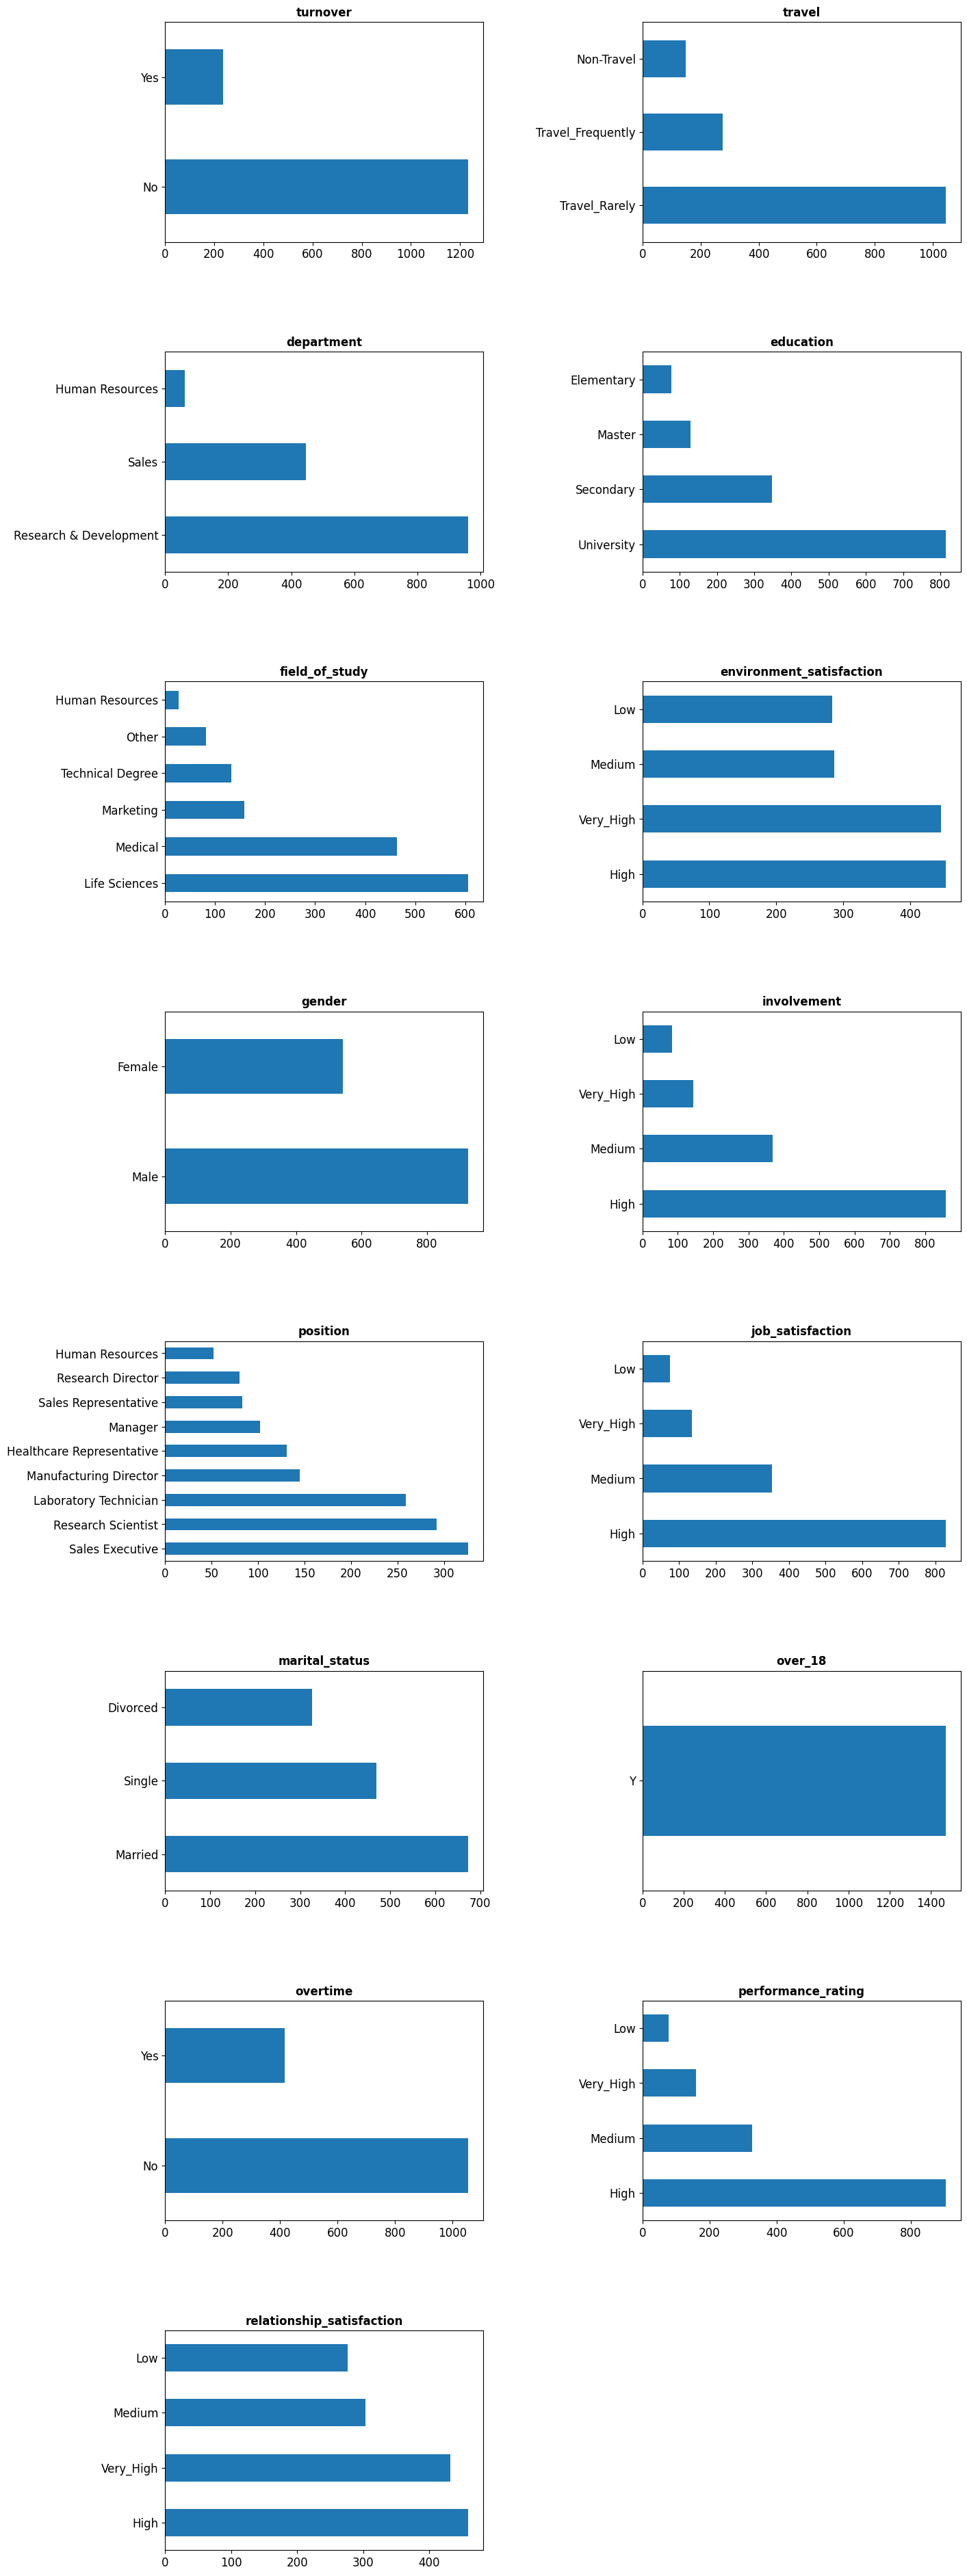

In [242]:
#Call the function passing only the categorical variables of the df
eda_cat_graph(df.select_dtypes(include=['object', 'category']))

Observations:

- The variable `over 18 years old` is a constant and we can exclude it, as it does not add any additional information.

- For the columns `education`, `job satisfaction` and `involvement` we can impute the missing values using directly the most frequent value, but to be more precise we can group the variables by `job position` and then impute the missing values by the most frequent value for each one, as it is common to have people with same profiles depending on the job position.

- CompanYX is a company that focuses on research and development, where positions such as sales executive and research scientist are the most demanded. 
  
- Most employees come from a university degree related to the field of medicine or life sciences. 
  
- Most of employees have a high involvement and performance
  
- Overtime is present but not very frequent. 

- The frequency of travel is low, but this is normal, as it depends largely on the nature of the work and the real needs of the company.

- Whereas employees are hightly involved and satisfied by their jobs at CompanYX, the envirorment satisfaction and relationship satisfaction have disperse opinion, meaning that here we have identified weak areas that can contain reasons to understand why people are leaving CompanYX.


In [243]:
#Drop the variable over_18
df.drop(columns="over_18", inplace=True)

In [244]:
#Find the most frequent values for the variables education, job satisfaction and involvement by position to imput values
df_filtered = df[["position", "education", "job_satisfaction", "involvement"]]

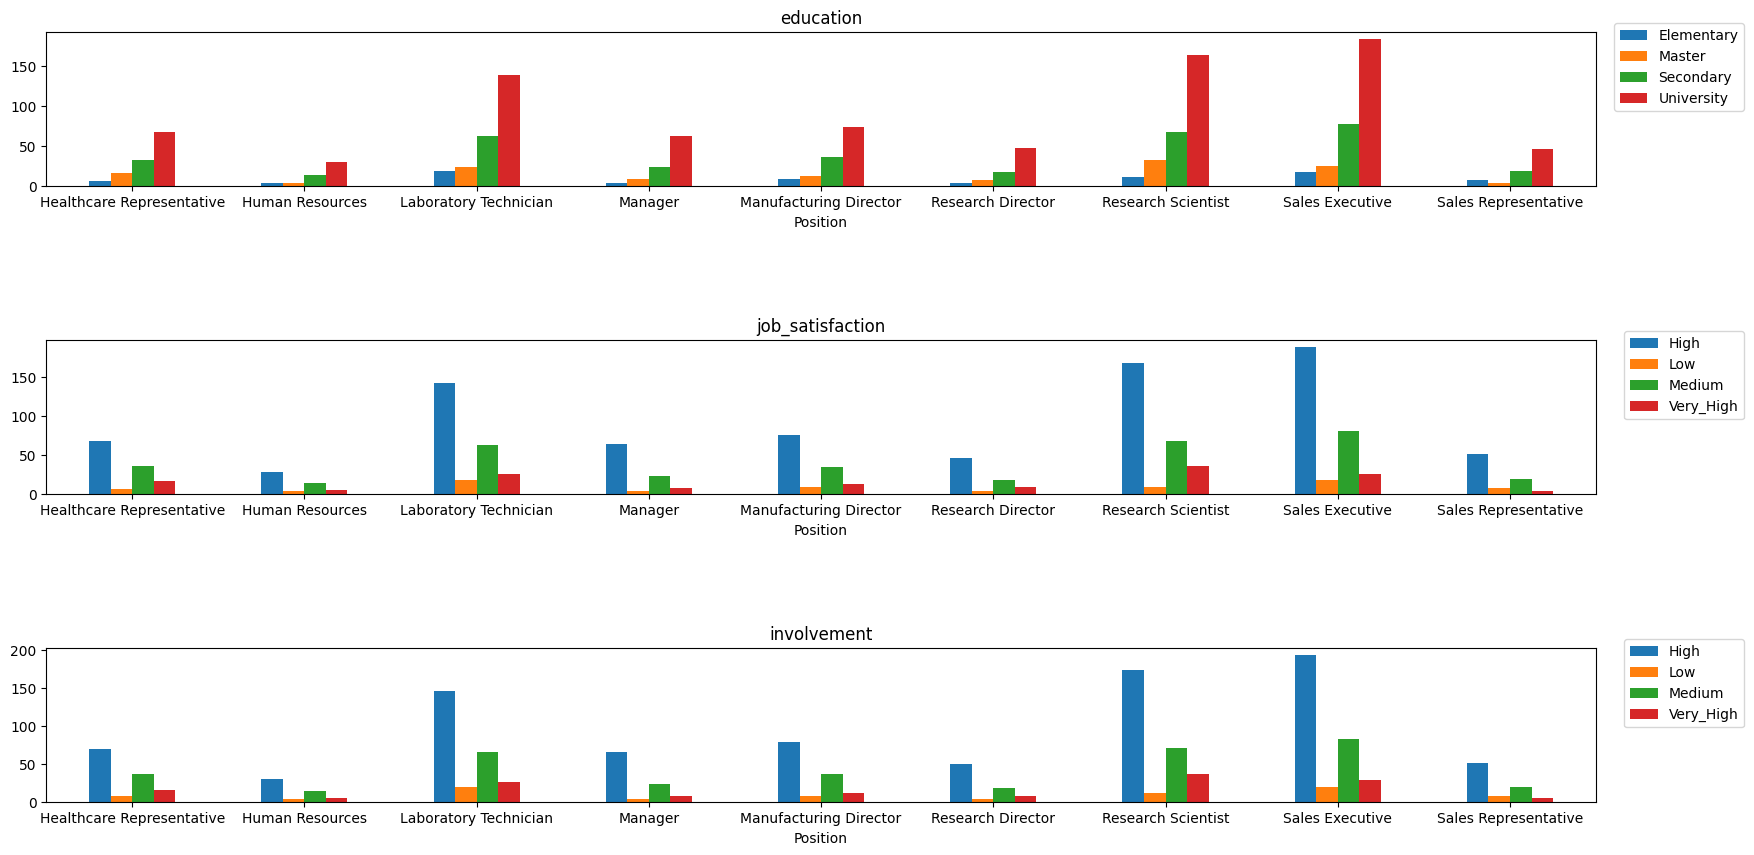

In [245]:
#Build a subplot matrix to plot the barplots
f, ax = plt.subplots(3,1, figsize=(20, 10))
plt.subplots_adjust(hspace=1, wspace=0.5)

#Define columns to plot
columns = ["education", "job_satisfaction", "involvement"]

for i, column in enumerate(columns):
    group_position = df_filtered.groupby("position")[column].value_counts().unstack() #Use unstack to pivot the values (job positions) to columns and the count of each job position to the values of each job position
    group_position.plot(kind="bar", ax=ax[i], title=column, legend=True)
    ax[i].set_xlabel("Position")
    ax[i].tick_params(rotation=0)
    ax[i].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()
    
    

- We can impute the level of education as "University"

- We can impute the job satisfacion as "High"

- We can impute the involvement as "High"

In [246]:
#Imput all the values
df["education"] = df["education"].fillna("University")
df["job_satisfaction"] = df["job_satisfaction"].fillna("High")
df["involvement"] = df["involvement"].fillna("High")

### 4.2- Numerical EDA

To have a view on the summary statistics, central tendency, dispersion, and distribution of the numerical variables first we will inspect values numericaly, then we can use a chart as we have done with the categorical variables.

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
distance_from_home,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
employees,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
id,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
job_level,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
monthly_income,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
num_companies_worked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
percent_salary_hike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
total_working_hours,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0
stock_option_level,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0


Observations:

- Variables `employees` and `total_working_hours` are constants and can be disregarded for analysis.

In [248]:
df.drop(columns=["employees", "total_working_hours"], inplace=True)

To visually inspect the distribution of numerical variables, we can use histograms. We can build a function to plot histograms for all numerical variables.

In [249]:
def eda_num_dist (num):
    #First we calculate the number of rows needed
    rows = ceil(num.shape[1] / 2)

    #Define the matrix of subplots
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (15, rows * 6))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    #Flatten to iterate through the graph as if it were 1-dimensional instead of 2-dimensional
    ax = ax.flat 

    #Create the loop that adds the plots
    for i, var in enumerate(num.columns):
        sns.histplot(num[var], ax=ax[i])
        #Set the title for each hisplot
        ax[i].set_title(f"Distribution of {var}")

    if num.shape[1] % 2 !=0:
        f.delaxes(ax[-1])

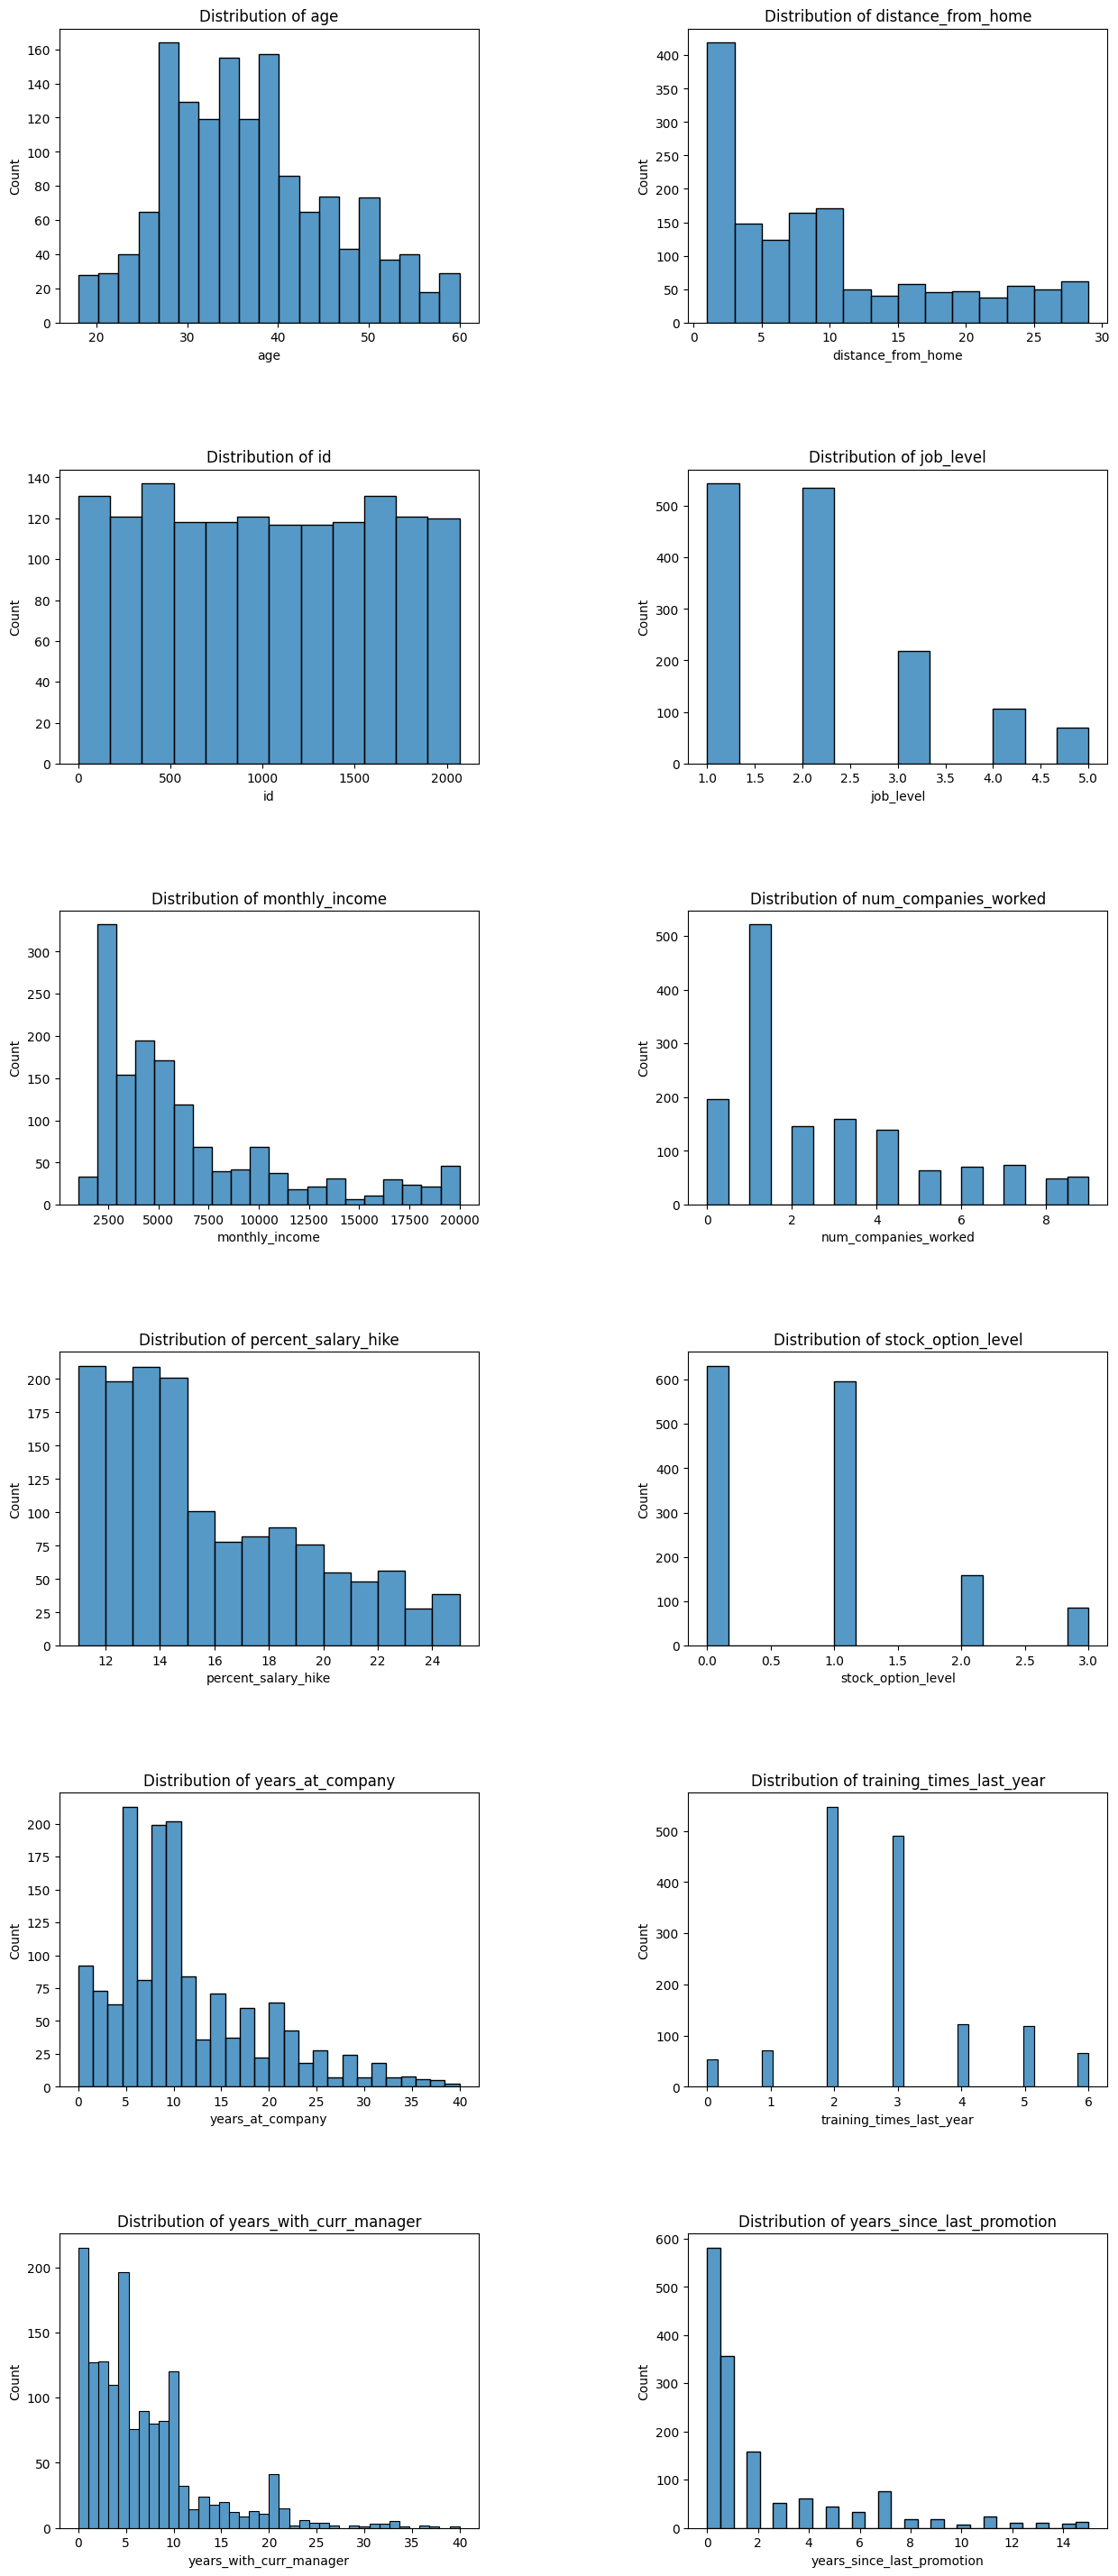

In [250]:
#Call the function passing only the categorical variables of the df
eda_num_dist(df.select_dtypes(include=['number']))

Observations:

- **Years at Company:** Right-skewed distribution with a peak between 5 to 10 years suggests potential issues like career advancement bottlenecks or job satisfaction challenges.

- **Age:** Normal distribution, expected for this variable.

- **Proximity to Work:** Majority of employees live close to work, implying the importance of in-person presence for CompanYX.

- **Job Level:** Expected distribution with more employees in lower and middle responsibility levels.

- **Monthly Income:** Multimodal distribution indicates clustered salaries at certain income levels.

- **Salary Hike:** Most common hike is between 11-15%.

- **Training:** Positive trend with most employees receiving 2 to 3 trainings per year, emphasizing continuous learning.

- **Time under Same Manager:** Right-skewed distribution suggests frequent managerial changes or recent hiring patterns.

- **Years Since Last Promotion:** Also right-skewed, indicating most promotions occur early in employees' careers, potentially reflecting growth or promotion policies.

We can analyze numerical variable correlations using a correlation matrix or visually with a heatmap.

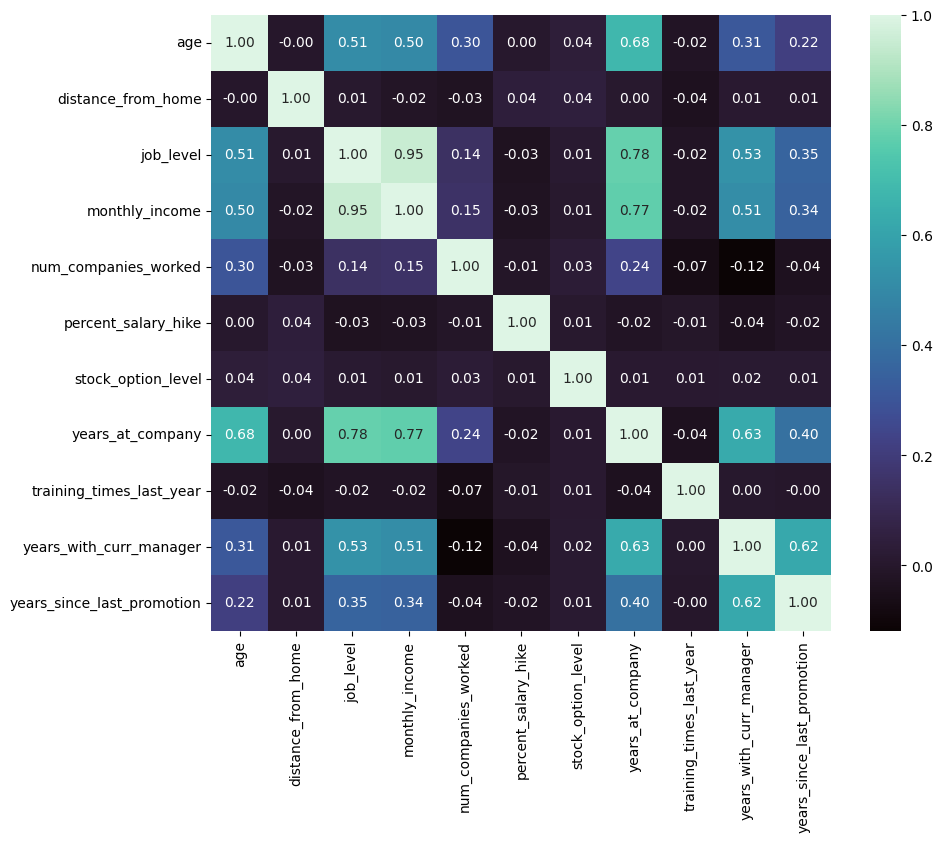

In [251]:
##Drop id as it is not a variable that adds value.
df_corr = df.drop(columns="id")

#Configure the correlation matrix
corr_matrix = df_corr.select_dtypes("number").corr()

#Configure the size of the plot and the visual using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt=".2f")
plt.show()

Observations:

- The correlation between `employment_level` and `years_within_the_company` is strong, as is the correlation between `employment_level` and `monthly_income`, revealing a possible compensation structure in which CompanYX compensates employees with greater longevity with jobs of greater responsibility and salary.

- `years_with_curr_manager` and `years_at_company` have a moderate correlation strenght meaning that there are some managers that seem to retain their subordinates for long time

- `training_times_last_year` shows no significant correlation with other variables such as `years_at_company` or `monthly_income` which may suggest that the training does not result in any improvement in the employee's condition but rather in a better preparation for the job competences.

- The correlation between `age` and `years_at_company` indicates that older employees present more loyalty to CompanYX.

- The low correlation between `num_companies_worked` and variables like `job_level` or `monthly_income` could imply that having worked at multiple companies does not necessarily correlate with higher positions or salaries within CompanYX. This could suggest that external experience is less valued at the hiring process.

---


## INSIGHTS

### 1- Turnover Rate

In [252]:
#Calculate of percentage by turnover
df["turnover"].value_counts(normalize=True) * 100

turnover
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [253]:
#Count the number of people by turnover
df["turnover"].value_counts() * 100

turnover
No     123300
Yes     23700
Name: count, dtype: int64

Observations:

- The Global Turnover Rate for CompanYX is 16%.

To provide context about the problem, in 2022 Randstard Research published a report on turnover for Spanish companies indicating a national average churn rate of 17%. This means that CompanYX has a turnover rate below the national average.

[Ranstard Research Report 2022](https://www.randstadresearch.es/informe-rotacion-2022/)

### 2- What are the economical costs derived from last year's turnover?

A study conducted by the Center for American Progress, structures the replacement cost of each worker according to the employee salary range as follows:

- The cost of turnover for employees earning less than $30,000 is 16.1% of their salary.

- The cost of turnover for employees earning between $30,000 and $50,000 is 19.7% of their salary.

- The cost of turnover for employees earning between $50,000 and $75,000 is 20.4% of their salary.

- The cost of turnover for employees earning more than $75,000 is 21% of their salary.

[Center for American Progress Study: There Are Significant Business Costs to Replacing Employees](https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/)

Now we apply the turnover cost ranges to our data

In [254]:
# First we calculate the salary per year for each employee
df["annual_income"] = df["monthly_income"].apply(lambda row: row * 12)

df[["monthly_income", "annual_income"]].head()

,monthly_income,annual_income
0,5993,71916
1,5130,61560
2,2090,25080
3,2909,34908
4,3468,41616


In [255]:
# Now we can apply the cost of the turnover discussed in the Center for American Progress study

df["employee_turnover_cost"] = df["annual_income"].apply(lambda row: 
                                                         0.161 * row if row <= 30000
                                                         else 0.197 * row if row > 3000 and row <= 50000
                                                         else 0.204 * row if row > 50000 and row <= 75000
                                                         else 0.21 * row)



In [256]:
#Filter data by turnover state Yes and sum all the costs
total_turnover_cost = df[df["turnover"]=="Yes"]["employee_turnover_cost"].sum()
total_turnover_cost

2719005.912

Last year's turnover cost was 2.72 M

### 3- Cost of low implicated employees

In [257]:
cost_low_involvement = df[(df["involvement"] == "Low") & (df["turnover"]=="Yes")]["employee_turnover_cost"].sum()
cost_low_involvement

368672.688

Employees with a low level of involvement have a turnover cost of 368.672 €

In [258]:
cost_low_involvement / total_turnover_cost

0.13559098432736325

The cost of low implicated employees represent the 13,55% of the total turnover cost

### 4- Cost of low implicated employees

In [259]:
cost_low_performance = df[(df["performance_rating"] == "Low") & (df["turnover"]=="Yes")]["employee_turnover_cost"].sum()
cost_low_performance

359750.712

Employees with a low level of involvement have a turnover cost of 359.750 €

In [260]:
cost_low_performance / total_turnover_cost

0.13230964685008012

The cost of employees with low performance represent the 13,23% of the total turnover cost

### 5- Is the performance related to the envirorment satisfaction?

To answer this question we can perform an independence test.

First we set out the hypotheses to be studied: 

- Null Hypothesis **(H0)**: The variables are independent
- Alternative Hypothesis **(H1)**: The variables are not independent

Secondly, we decide what our significance threshold will be:

Our selected threshold will be 0.05, meaning:

- A p-value  ≤ 0.05 will be significant and we can reject the null hypothesis i.e. there is association between variables
- A p-value > 0.05 won't be statistically significant enough to reject the null hypothesis i.e. there is not association between variables
- We are 95% confident about the test result

In [261]:
#Import the the chi2 from scipy library
from scipy.stats import chi2_contingency
#Create the contingency table
contingency_table = pd.crosstab(df["performance_rating"], df["environment_satisfaction"])
contingency_table

environment_satisfaction,High,Low,Medium,Very_High
performance_rating,,,,
High,269,167,185,283
Low,19,16,23,20
Medium,114,65,51,98
Very_High,51,36,28,45


In [262]:
#Apply chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)
p, expected

(0.16902835154689058,
 array([[278.57959184, 174.65034014, 176.4952381 , 274.27482993],
        [ 24.03673469,  15.06938776,  15.22857143,  23.66530612],
        [101.07755102,  63.36870748,  64.03809524,  99.51564626],
        [ 49.30612245,  30.91156463,  31.23809524,  48.54421769]]))

- The chi-squared test of independence yielded a p-value of approximately 0.169, suggesting no significant association between performance rating and environment satisfaction.
- The contingency table indicates similar counts across different levels of environment satisfaction for each performance rating category.
- Overall, there is no evidence to reject the null hypothesis, suggesting that performance rating is independent on environment satisfaction level

---

# 4- Turnover Profiling

In this last section we are going to analyze two profiles:

- **P1**: The top 3 profiles that are likely to leave the company the most
  
- **P2**: The top 3 profiles that have generated the greater economical impact

For simplicity we transform the variable `turnover` into a binary variable, where Yes = 1 and No = 0.

In [263]:
df["turnover"] = df["turnover"].replace(["Yes", "No"], [1,0])

We can perform a feature selection after EDA results.

The selected features to study are `age`, `education`, `environment_satisfaction`, `relationship_satisfaction`, `gender`, `position`, `marital_status`, `monthly_income`, `num_companies_worked`, `overtime`, `performance_rating`, `years_at_company` and `years_with_curr_manager`

Then, we can group the numerical variabels using bins 

In [264]:
#Define bin ages
bins_age = [18, 30, 50, 60]

#Create the bins based in the df data
df["binned_ages"] = pd.cut(df["age"], bins_age, include_lowest=True)

#Repeat for the other variables

bins_c_worked = [0, 1, 3, 9]

df["binned_c_worked"] = pd.cut(df["num_companies_worked"], bins_c_worked, include_lowest=True)

bins_m_salary = [0, 2500, 5000, 10000, 20000]

df["binned_m_salary"] = pd.cut(df["monthly_income"], bins_m_salary, include_lowest=True)

bins_years_at_company=[0, 5, 10, 15, 40]

df["binned_y_at_company"] = pd.cut(df["years_at_company"], bins_years_at_company, include_lowest=True)

bins_years_with_curr_manager= [0, 5, 10, 15, 40]

df["binned_y_curr_manager"] = pd.cut(df["years_with_curr_manager"], bins_years_with_curr_manager, include_lowest=True)



Now we create the categorical and numerical groups that we will plot

In [265]:
num_groups = ["binned_ages", "binned_c_worked", "binned_m_salary", "binned_y_at_company", "binned_y_curr_manager"]

In [266]:
cat_groups = ["education", "involvement", "gender", "marital_status", "environment_satisfaction", "overtime", "performance_rating", "relationship_satisfaction"]

### 4.1- Profiles with the greatest turnover rates

To analyze turnover rates per department and position, we'll start by determining the distribution of employees across departments. We can achieve this by calculating the percentage of employees in each department.

In [267]:
df['department'].value_counts(normalize=True)

department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

Now we calculate the percentage of employees that left the company per department

In [268]:
df_turnover = df[df['turnover'] == 1]
df_turnover['department'].value_counts(normalize=True)

department
Research & Development    0.561181
Sales                     0.388186
Human Resources           0.050633
Name: proportion, dtype: float64

Turnover is higher as higher is the number of employees, so we should study turnover by normalizing it with the average per group.

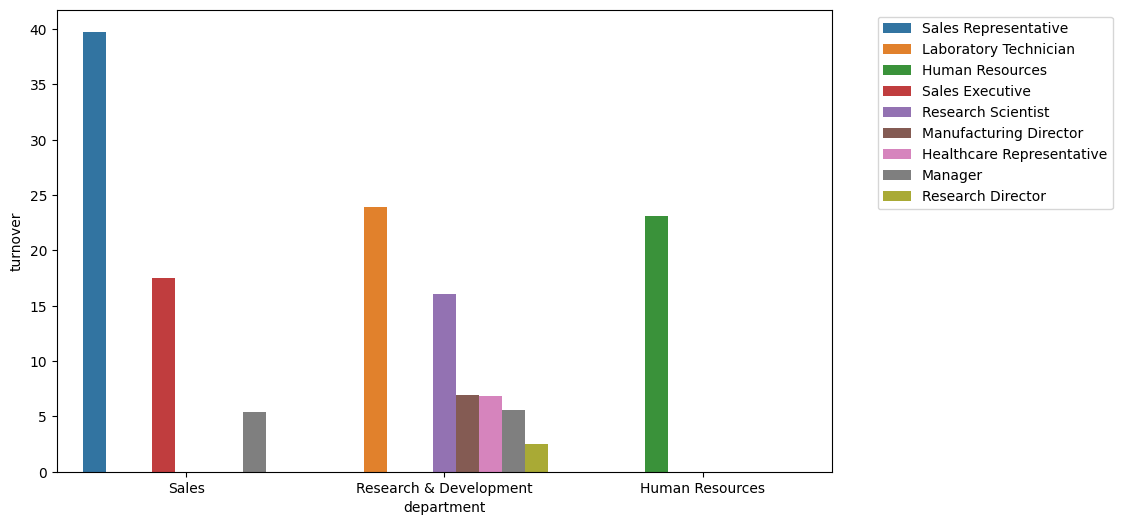

In [269]:
#Group per department and position and apply the mean to the values of turnover
df_p1 = (df.groupby(['department', 'position'])["turnover"].mean().sort_values(ascending=False) * 100).reset_index()

#Configure the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_p1, x='department', y='turnover', hue='position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Now we can select the top 3 per department

In [270]:
top3_positions = df_p1.nlargest(3, 'turnover')

top3_positions

,department,position,turnover
0,Sales,Sales Representative,39.759036
1,Research & Development,Laboratory Technician,23.938224
2,Human Resources,Human Resources,23.076923


To analyze the most frequent characteristics among the top 3 positions, we can utilize the mode

In [271]:
#Create a df filtering only the caracteristics of employees that left the company by the 3 top positions
df_top3 = df_turnover[df_turnover['position'].isin(top3_positions['position'])]

#Find mode values for categorical variables
mode_categorical = df_top3[cat_groups].mode().iloc[0]
mode_categorical


education                    University
involvement                        High
gender                             Male
marital_status                   Single
environment_satisfaction            Low
overtime                             No
performance_rating                 High
relationship_satisfaction          High
Name: 0, dtype: object

In [272]:
#Find the mode for numerical values
mode_numerical_bins = df_top3[num_groups].mode().iloc[0]
mode_numerical_bins

binned_ages                (17.999, 30.0]
binned_c_worked             (-0.001, 1.0]
binned_m_salary          (-0.001, 2500.0]
binned_y_at_company         (-0.001, 5.0]
binned_y_curr_manager       (-0.001, 5.0]
Name: 0, dtype: interval

### 4.2- Profiles with the greatest turnover costs

To profile the top 3 positions for turnover costs in economic terms, we're interested in identifying the positions with the highest total cost. The rest of the process will be the same

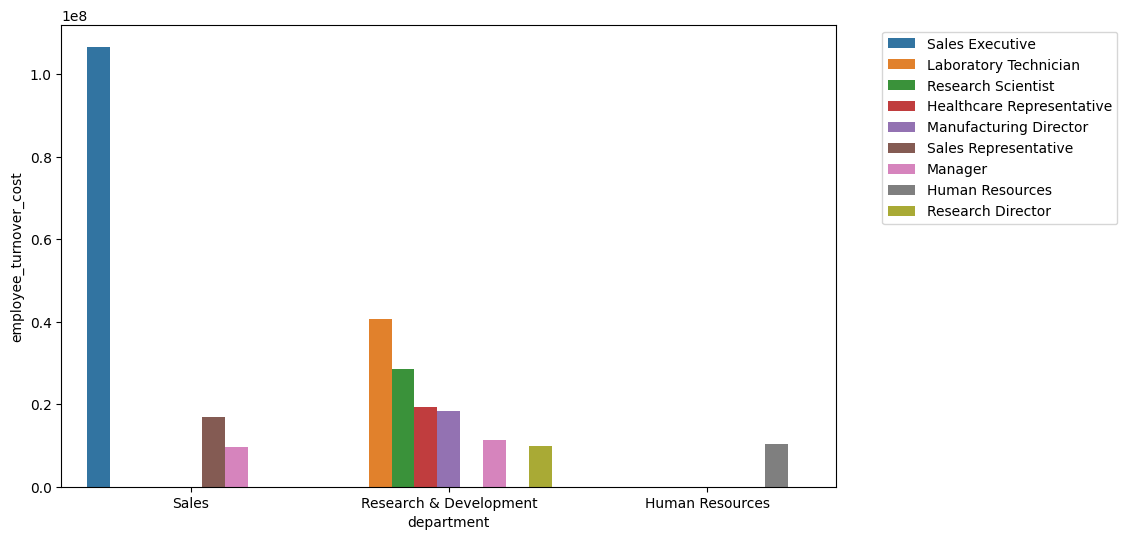

In [273]:
df_p2 = (df_turnover.groupby(['department', 'position'])["employee_turnover_cost"].sum().sort_values(ascending=False) * 100).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_p2, x='department', y='employee_turnover_cost', hue='position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [274]:
top3_positions_p2 = df_p2.nlargest(3, 'employee_turnover_cost')
top3_positions_p2

,department,position,employee_turnover_cost
0,Sales,Sales Executive,106635585.6
1,Research & Development,Laboratory Technician,40629009.6
2,Research & Development,Research Scientist,28620178.8


In [275]:
top3_positions_p2 = df_p2.nlargest(3, 'employee_turnover_cost')
df_top3_p2 = df_turnover[df_turnover['position'].isin(top3_positions_p2['position'])]

mode_categorical_p2 = df_top3_p2[cat_groups].mode().iloc[0]
mode_categorical_p2

education                    University
involvement                        High
gender                             Male
marital_status                   Single
environment_satisfaction            Low
overtime                            Yes
performance_rating                 High
relationship_satisfaction          High
Name: 0, dtype: object

In [276]:
mode_numerical_bins_p2 = df_top3_p2[num_groups].mode().iloc[0]
mode_numerical_bins_p2

binned_ages                  (30.0, 50.0]
binned_c_worked             (-0.001, 1.0]
binned_m_salary          (2500.0, 5000.0]
binned_y_at_company           (5.0, 10.0]
binned_y_curr_manager       (-0.001, 5.0]
Name: 0, dtype: interval

### 4.3- Quantify profiling with active employees

To quantify the number of actives employees and their turnover cost we filter our data using the profiling caracteristics

##### Profile 1 active employees

In [277]:
filtered_profile_p1 = df[
    (df["turnover"] == 0) &
    (df["position"].isin(top3_positions['position'])) &
    (df["environment_satisfaction"] == "Low") & 
    (df["performance_rating"] != "Very_high") &
    (df["overtime"] == "No") &
    (df["age"] <= 30) & 
    (df["monthly_income"] <= 2500) & 
    (df["years_at_company"] <= 5)
]

number_of_matches_p1 = filtered_profile_p1.shape[0]


number_of_matches_p1


3

Potential turnover costs for this employees

In [287]:
cost_p1 = filtered_profile_p1["employee_turnover_cost"].sum()
print(round(cost_p1,2),'€')

12797.57


What this cost represent from the actual turnover cost?

In [294]:
per_cost_p1= (cost_p1/total_turnover_cost) * 100
print(round(per_cost_p1,2), '%')

0.47 %


##### Profile 2 active employees

In [284]:
filtered_profile_p2 = df[
    (df["turnover"] == 0) &
    df["position"].isin(top3_positions_p2['position']) & 
    (df["environment_satisfaction"]== "Low") &
    (df["performance_rating"]!= "Very_high") &
    (df["overtime"] == "Yes") &
    (df["age"] > 30) & (df["age"] <= 50) &
    (df["monthly_income"] > 2500) & (df["monthly_income"] <= 5000) &
    (df["years_at_company"] > 5) & (df["years_at_company"] <= 10)
]

number_of_matches_p2 = filtered_profile_p2.shape[0]


number_of_matches_p2

4

Potential turnover costs for this employees

In [300]:
cost_p2 = filtered_profile_p2["employee_turnover_cost"].sum()
print(round(cost_p2,2),'€')

37486.56 €


What this cost represent from the actual turnover cost?

In [296]:
per_cost_p2= (cost_p2/total_turnover_cost) *100
print(round(per_cost_p2,2),'%')

1.38 %


##### Total of potential costs

In [302]:
print(round((cost_p1 + cost_p2),2), '€')

print('This represents a',round(per_cost_p1 + per_cost_p2, 2), '%', 'from last turnover costs')


50284.13 €
This represents a 1.85 % from last turnover costs
